# `Studio dell'isomorifsmo a partire dallo spettro`

Dato un grafo $G$ con matrice di adiacenza $A_G$ e un grafo $H$ con matrice $A_H$,

- Se $G$ e $H$ sono **isomorfi**, esiste una matrice di permutazione $P$ tale che
  $
    A_H \;=\; P\,A_G\,P^\top.
  $
  In questo caso **condividono lo stesso spettro**:
  $
    \mathrm{spettro}(A_G)\;=\;\mathrm{spettro}(A_H).
  $

- **L’implicazione inversa** però **non vale** in generale!  
  Esistono coppie di grafi non isomorfi, detti **cospettrali**, che però hanno
  $
    \mathrm{spettro}(A_{G_1}) \;=\;\mathrm{spettro}(A_{G_2}).
  $
  I primi esempi classici furono dati da Cvetković (la “Saltire pair”) e sono 
  descritti in Van Dam & Haemers (2003) “Which graphs are determined by their spectrum?” “classici”

- **Saltire pair** su 5 vertici, spettro $\{2,0^3,-2\}$ per entrambi.
- Van Dam–Haemers (2003) mostrano molte altre coppie, anche su 6–7 vertici.
- In generale: per **nessuna** delle matrici
  - adiacenza $A$,
  - laplaciana $L$,
  - signless-laplaciana $|L|$,
  
  si ottiene uno “spettro unico” che caratterizzi il grafo up-to-isomorfismo.

---

**Pertanto**:  
- Se gli spettri **differiscono**, i grafi **non** possono essere isomorfi.  
- Se gli spettri **coincidono**, i grafi **possono** essere isomorfi, ma **non è garantito**.

Nelle celle successive mostreremo in pratica come costruire e confrontare due grafi cospettrali, calcolando i loro autovalori.  

## Librerie

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

## Funzioni

In [2]:
# ------------------------------------------------------------------
# Helper: conversione rapida a matrice di adiacenza -----------------

def to_adj(M):
    if isinstance(M, (nx.Graph, nx.DiGraph)):
        return nx.to_numpy_array(M)
    return np.asarray(M)

# ------------------------------------------------------------------
# Funzioni spettrali -------------------------------------------------

def sorted_eigvals(A):
    return np.sort(np.linalg.eigvals(to_adj(A)).real)


def laplacian(A):
    A = to_adj(A)
    D = np.diag(A.sum(axis=1))
    return D - A


def normalized_laplacian(A):
    A = to_adj(A)
    D = np.diag(A.sum(axis=1))
    with np.errstate(divide="ignore"):
        D_inv_sqrt = np.diag(1 / np.sqrt(A.sum(axis=1)))
    D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0
    return D_inv_sqrt @ laplacian(A) @ D_inv_sqrt


def signless_laplacian(A):
    A = to_adj(A)
    D = np.diag(A.sum(axis=1))
    return D + A

# ------------------------------------------------------------------
# Visual -------------------------------------------------------------

def show_graph_pair(G1, G2, titles, layout="circular"):
    pos_fun = nx.circular_layout if layout == "circular" else nx.spring_layout
    pos1, pos2 = pos_fun(G1), pos_fun(G2)
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    nx.draw(G1, pos1, with_labels=True, node_color="skyblue")
    plt.title(titles[0])
    plt.subplot(1, 2, 2)
    nx.draw(G2, pos2, with_labels=True, node_color="lightgreen")
    plt.title(titles[1])
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# Report -------------------------------------------------------------

def compare_pair(A1, A2, name):
    A1m, A2m = to_adj(A1), to_adj(A2)
    specs = {
        "Adjacency A": (sorted_eigvals(A1m), sorted_eigvals(A2m)),
        "Laplacian L": (sorted_eigvals(laplacian(A1m)), sorted_eigvals(laplacian(A2m))),
        "Normalized L": (sorted_eigvals(normalized_laplacian(A1m)), sorted_eigvals(normalized_laplacian(A2m))),
        "Signless |L|": (sorted_eigvals(signless_laplacian(A1m)), sorted_eigvals(signless_laplacian(A2m))),
        "Line‑graph A": (
            sorted_eigvals(nx.to_numpy_array(nx.line_graph(nx.from_numpy_array(A1m)))),
            sorted_eigvals(nx.to_numpy_array(nx.line_graph(nx.from_numpy_array(A2m)))),
        ),
    }
    print(f"\n{name}")
    for mat_name, (s1, s2) in specs.items():
        print(f"{mat_name:15}: {'cospettrali' if np.allclose(s1, s2) else 'diversi'}")

## Esempi

### Saltire pair (bandiera scozzese)

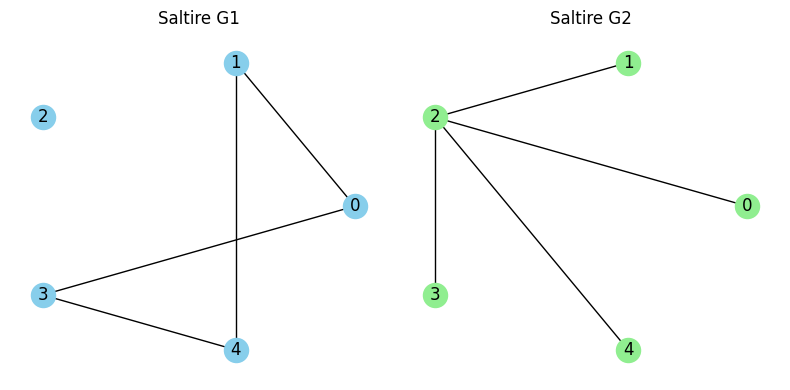


Saltire pair
Adjacency A    : cospettrali
Laplacian L    : diversi
Normalized L   : diversi
Signless |L|   : diversi
Line‑graph A   : diversi


In [5]:
A_saltire_1 = np.array([
    [0,1,0,1,0],
    [1,0,0,0,1],
    [0,0,0,0,0],
    [1,0,0,0,1],
    [0,1,0,1,0]
])
A_saltire_2 = np.array([
    [0,0,1,0,0],
    [0,0,1,0,0],
    [1,1,0,1,1],
    [0,0,1,0,0],
    [0,0,1,0,0]
])
G_s1, G_s2 = map(nx.from_numpy_array, (A_saltire_1, A_saltire_2))
show_graph_pair(G_s1, G_s2, ["Saltire G1", "Saltire G2"])
compare_pair(A_saltire_1, A_saltire_2, "Saltire pair")

### Alberi

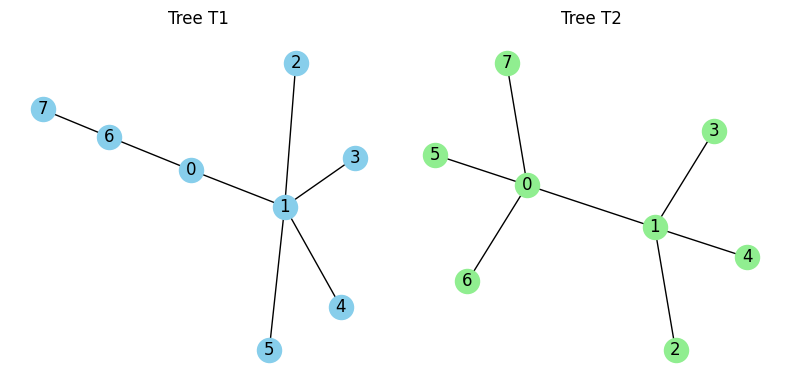


Alberi (8 nodi)
Adjacency A    : cospettrali
Laplacian L    : diversi
Normalized L   : diversi
Signless |L|   : diversi
Line‑graph A   : diversi


In [6]:
A_tree_1 = np.array([
    [0,1,0,0,0,0,1,0],
    [1,0,1,1,1,1,0,0],
    [0,1,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,1,0]
])
A_tree_2 = np.array([
    [0,1,0,0,0,1,1,1],
    [1,0,1,1,1,0,0,0],
    [0,1,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0]
])
G_t1, G_t2 = map(nx.from_numpy_array, (A_tree_1, A_tree_2))
show_graph_pair(G_t1, G_t2, ["Tree T1", "Tree T2"], layout="spring")
compare_pair(A_tree_1, A_tree_2, "Alberi (8 nodi)")

### Triangolo + isolato vs stella K1,3

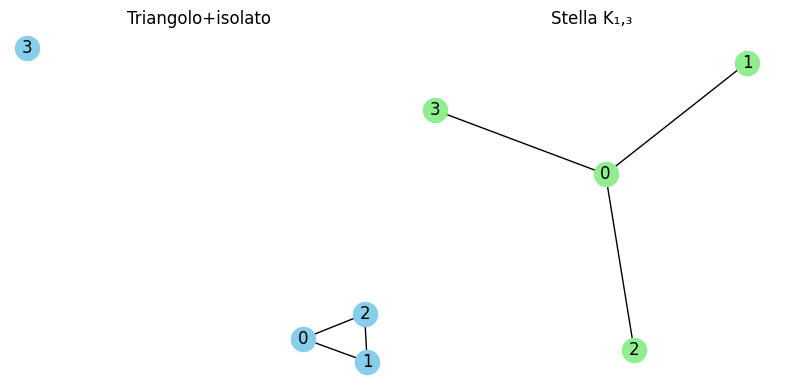


Triangolo vs Stella (|L|‑cospettrali)
Adjacency A    : diversi
Laplacian L    : diversi
Normalized L   : diversi
Signless |L|   : cospettrali
Line‑graph A   : cospettrali


In [7]:
A_tri_iso = np.array([
    [0,1,1,0],
    [1,0,1,0],
    [1,1,0,0],
    [0,0,0,0]
])
A_star = np.array([
    [0,1,1,1],
    [1,0,0,0],
    [1,0,0,0],
    [1,0,0,0]
])
G_tri, G_star = map(nx.from_numpy_array, (A_tri_iso, A_star))
show_graph_pair(G_tri, G_star, ["Triangolo+isolato", "Stella K₁,₃"], layout="spring")
compare_pair(A_tri_iso, A_star, "Triangolo vs Stella (|L|‑cospettrali)")

### GM‑switching pair (8 nodi)

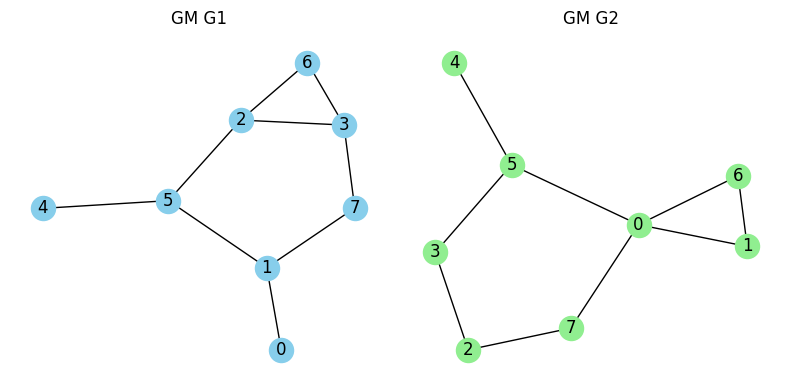


GM‑switching pair (8 nodi)
Adjacency A    : cospettrali
Laplacian L    : diversi
Normalized L   : diversi
Signless |L|   : diversi
Line‑graph A   : diversi


In [ ]:
A_gm_1 = np.array([
    [0,1,0,0,0,0,0,0],
    [1,0,0,0,0,1,0,1],
    [0,0,0,1,0,1,1,0],
    [0,0,1,0,0,0,1,1],
    [0,0,0,0,0,1,0,0],
    [0,1,1,0,1,0,0,0],
    [0,0,1,1,0,0,0,0],
    [0,1,0,1,0,0,0,0]
])
A_gm_2 = np.array([
    [0,1,0,0,0,1,1,1],
    [1,0,0,0,0,0,1,0],
    [0,0,0,1,0,0,0,1],
    [0,0,1,0,0,1,0,0],
    [0,0,0,0,0,1,0,0],
    [1,0,0,1,1,0,0,0],
    [1,1,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0]
])
G_gm1, G_gm2 = map(nx.from_numpy_array, (A_gm_1, A_gm_2))
show_graph_pair(G_gm1, G_gm2, ["GM G1", "GM G2"], layout="spring")
compare_pair(A_gm_1, A_gm_2, "GM-switching pair (8 nodi)")